# 多項分類器によるMNIST分類

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

Instructions for updating:
Use the retry module or similar alternatives.


http://yann.lecun.com/exdb/mnist/
からダウンロードした記憶がある

In [3]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)#ここのone_hotはone_hotエンコーディングのこと？？？後で確認

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
images, labels = mnist.train.next_batch(10)

In [5]:
print(images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [6]:
print(labels[0]) #ここでone-hotエンコーディングされたラベルがついてることを確認した

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


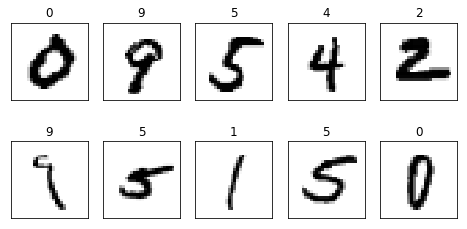

In [11]:
fig = plt.figure(figsize = (8,4))
for c, (image, label) in enumerate(zip(images, labels)):#zipは最も小さいサイズのシーケンスの要素を処理し尽くした時に止まる
    subplot = fig.add_subplot(2, 5, c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(label)) #labelのマックスのインデックスを返す、つまりonehotエンコーディングなので数字の番号を返す
    subplot.imshow(image.reshape((28,28)), vmin =0, vmax = 1, cmap = plt.cm.gray_r, interpolation="nearest")#一次元なのでrehape()
    #cmap = plt.cm.gray_rは、画像をグレースケールで表示する指定で、vminとvmaxは濃度として含まれる数値の最小値と最大値を与えることで、画像の濃淡を適切に調整している。
    #interpolation="nearest"の指定で画像を滑らかに修正する機能を消している。